## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is cleaned up a bit from the original code that I hacked together, and is only lightly commented. I wrote the code to be easy to interpret and understand, even for those who are new to Python. I tried never to be clever or even more efficient at the cost of being harder to understand. The code is in Python3, using the versions of libraries as of April 2021. 

This notebook may contain additional code to create models and images not in the book. That material is included here to demonstrate additional techniques.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

### A note on variation of output

Note as always that due to the use of random numbers, some of the results here may differ from those in the book (since I re-ran everything to prepare this notebook), and will probably be different yet again if you run this notebook.

# Adapted by Daniel Acuna (acuna.io) for IST 700 Applied Deep Learning, iSchool, Syracuse University

## Chapter 18: Autoencoders - Notebook 2: MNIST 1

In [ ]:
# Some code inspired or based on:
#    https://blog.keras.io/building-autoencoders-in-keras.html
#    https://jmetzen.github.io/2015-11-27/vae.html
#    https://arxiv.org/pdf/1606.05908.pdf  (https://github.com/cdoersch/vae_tutorial)
#

In [1]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

In [2]:
random_seed = 42
np.random.seed(random_seed)

# Read MNIST data. We won't be using the y_train or y_test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
pixels_per_image = np.prod(X_train.shape[1:])

# Cast values into the current floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# Normalize the range from [0,255] to [0,1]
X_train /= 255.
X_test /= 255.

# Reshape the data into a grid with one row per sample, each row 784 (28*28) pixels
X_train = X_train.reshape((len(X_train), pixels_per_image))
X_test = X_test.reshape((len(X_test), pixels_per_image))

print("X_train.shape = ",X_train.shape, " X_test.shape = ",X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train.shape =  (60000, 784)  X_test.shape =  (10000, 784)


In [3]:
# Show a grid of MNIST images and our prediction for each one

def draw_predictions_set(predictions, filename=None):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i+6)
        plt.imshow(predictions[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()    
    plt.show()

In [4]:
X_train.shape

(60000, 784)

In [5]:
# Build and train our first autoencoder
num_latent_vars = 20

AE1 = Sequential()
AE1.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE1.add(Dense(pixels_per_image, activation='sigmoid'))
AE1.compile(optimizer='adam', loss='binary_crossentropy')
np.random.seed(42)

AE1.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 4s - loss: 0.2456 - val_loss: 0.1754
Epoch 2/50
469/469 - 1s - loss: 0.1596 - val_loss: 0.1452
Epoch 3/50
469/469 - 1s - loss: 0.1397 - val_loss: 0.1326
Epoch 4/50
469/469 - 2s - loss: 0.1306 - val_loss: 0.1260
Epoch 5/50
469/469 - 1s - loss: 0.1254 - val_loss: 0.1219
Epoch 6/50
469/469 - 2s - loss: 0.1219 - val_loss: 0.1188
Epoch 7/50
469/469 - 2s - loss: 0.1196 - val_loss: 0.1171
Epoch 8/50
469/469 - 1s - loss: 0.1183 - val_loss: 0.1161
Epoch 9/50
469/469 - 2s - loss: 0.1175 - val_loss: 0.1155
Epoch 10/50
469/469 - 1s - loss: 0.1171 - val_loss: 0.1153
Epoch 11/50
469/469 - 1s - loss: 0.1169 - val_loss: 0.1151
Epoch 12/50
469/469 - 1s - loss: 0.1167 - val_loss: 0.1148
Epoch 13/50
469/469 - 1s - loss: 0.1165 - val_loss: 0.1147
Epoch 14/50
469/469 - 1s - loss: 0.1164 - val_loss: 0.1148
Epoch 15/50
469/469 - 1s - loss: 0.1163 - val_loss: 0.1146
Epoch 16/50
469/469 - 1s - loss: 0.1163 - val_loss: 0.1145
Epoch 17/50
469/469 - 1s - loss: 0.1162 - val_loss: 0.1145
Epoch 

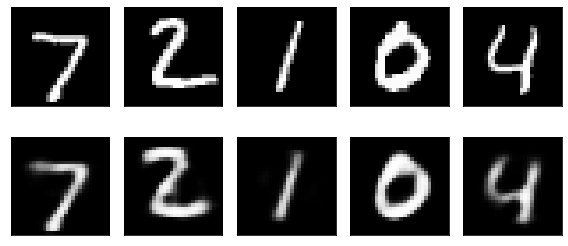

In [6]:
predictions1 = AE1.predict(X_test)
draw_predictions_set(predictions1, 'NB2-MLP-AE1')

In [7]:
# Build and train our second, more compress-y autoencoder
num_latent_vars = 10

AE2 = Sequential()
AE2.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE2.add(Dense(pixels_per_image, activation='sigmoid'))
AE2.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE2.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 2s - loss: 0.2762 - val_loss: 0.2055
Epoch 2/50
469/469 - 1s - loss: 0.1883 - val_loss: 0.1747
Epoch 3/50
469/469 - 1s - loss: 0.1713 - val_loss: 0.1667
Epoch 4/50
469/469 - 2s - loss: 0.1663 - val_loss: 0.1632
Epoch 5/50
469/469 - 2s - loss: 0.1634 - val_loss: 0.1607
Epoch 6/50
469/469 - 1s - loss: 0.1613 - val_loss: 0.1589
Epoch 7/50
469/469 - 2s - loss: 0.1597 - val_loss: 0.1576
Epoch 8/50
469/469 - 1s - loss: 0.1585 - val_loss: 0.1564
Epoch 9/50
469/469 - 2s - loss: 0.1575 - val_loss: 0.1557
Epoch 10/50
469/469 - 2s - loss: 0.1568 - val_loss: 0.1551
Epoch 11/50
469/469 - 2s - loss: 0.1563 - val_loss: 0.1546
Epoch 12/50
469/469 - 1s - loss: 0.1558 - val_loss: 0.1542
Epoch 13/50
469/469 - 1s - loss: 0.1555 - val_loss: 0.1539
Epoch 14/50
469/469 - 1s - loss: 0.1552 - val_loss: 0.1536
Epoch 15/50
469/469 - 1s - loss: 0.1550 - val_loss: 0.1535
Epoch 16/50
469/469 - 1s - loss: 0.1547 - val_loss: 0.1533
Epoch 17/50
469/469 - 1s - loss: 0.1546 - val_loss: 0.1531
Epoch 

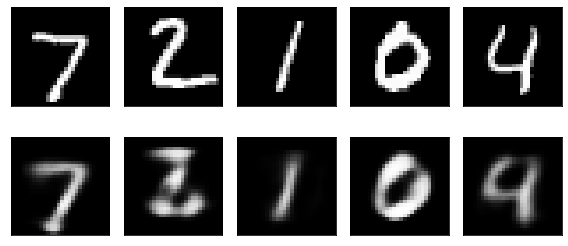

In [8]:
predictions2 = AE2.predict(X_test)
draw_predictions_set(predictions2, 'NB2-MLP-AE2')

In [9]:
# Build and train our third, super compress-y autoencoder
num_latent_vars = 3

AE3 = Sequential()
AE3.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE3.add(Dense(pixels_per_image, activation='sigmoid'))
AE3.compile(optimizer='adam', loss='binary_crossentropy')

AE3.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 2s - loss: 0.3190 - val_loss: 0.2496
Epoch 2/50
469/469 - 2s - loss: 0.2417 - val_loss: 0.2323
Epoch 3/50
469/469 - 1s - loss: 0.2306 - val_loss: 0.2276
Epoch 4/50
469/469 - 1s - loss: 0.2271 - val_loss: 0.2249
Epoch 5/50
469/469 - 1s - loss: 0.2248 - val_loss: 0.2228
Epoch 6/50
469/469 - 1s - loss: 0.2231 - val_loss: 0.2214
Epoch 7/50
469/469 - 2s - loss: 0.2217 - val_loss: 0.2201
Epoch 8/50
469/469 - 2s - loss: 0.2206 - val_loss: 0.2191
Epoch 9/50
469/469 - 1s - loss: 0.2196 - val_loss: 0.2182
Epoch 10/50
469/469 - 1s - loss: 0.2188 - val_loss: 0.2175
Epoch 11/50
469/469 - 2s - loss: 0.2181 - val_loss: 0.2170
Epoch 12/50
469/469 - 1s - loss: 0.2176 - val_loss: 0.2166
Epoch 13/50
469/469 - 2s - loss: 0.2171 - val_loss: 0.2160
Epoch 14/50
469/469 - 2s - loss: 0.2166 - val_loss: 0.2157
Epoch 15/50
469/469 - 1s - loss: 0.2163 - val_loss: 0.2154
Epoch 16/50
469/469 - 1s - loss: 0.2159 - val_loss: 0.2151
Epoch 17/50
469/469 - 1s - loss: 0.2155 - val_loss: 0.2147
Epoch 

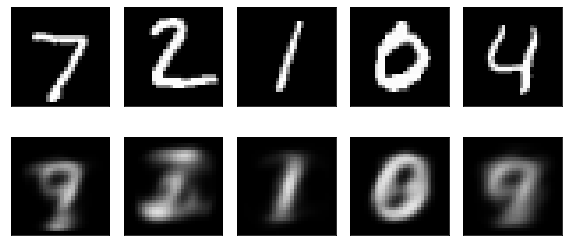

In [ ]:
predictions3 = AE3.predict(X_test)
draw_predictions_set(predictions3, 'NB2-MLP-AE3')

# Activity 1
Create a deeper autoencoder

In [10]:
# Creat a deeper 

num_latent_vars = 10

AE4 = Sequential()
# Define the rest of the layers
AE4.add(Dense(pixels_per_image, activation='sigmoid'))
AE4.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE4.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 3s - loss: 0.1872 - val_loss: 0.1435
Epoch 2/50
469/469 - 2s - loss: 0.1388 - val_loss: 0.1332
Epoch 3/50
469/469 - 2s - loss: 0.1319 - val_loss: 0.1289
Epoch 4/50
469/469 - 2s - loss: 0.1281 - val_loss: 0.1258
Epoch 5/50
469/469 - 2s - loss: 0.1252 - val_loss: 0.1236
Epoch 6/50
469/469 - 2s - loss: 0.1232 - val_loss: 0.1218
Epoch 7/50
469/469 - 2s - loss: 0.1214 - val_loss: 0.1207
Epoch 8/50
469/469 - 2s - loss: 0.1199 - val_loss: 0.1197
Epoch 9/50
469/469 - 2s - loss: 0.1187 - val_loss: 0.1186
Epoch 10/50
469/469 - 2s - loss: 0.1177 - val_loss: 0.1179
Epoch 11/50
469/469 - 2s - loss: 0.1168 - val_loss: 0.1174
Epoch 12/50
469/469 - 2s - loss: 0.1159 - val_loss: 0.1166
Epoch 13/50
469/469 - 2s - loss: 0.1151 - val_loss: 0.1162
Epoch 14/50
469/469 - 2s - loss: 0.1145 - val_loss: 0.1157
Epoch 15/50
469/469 - 2s - loss: 0.1140 - val_loss: 0.1153
Epoch 16/50
469/469 - 2s - loss: 0.1133 - val_loss: 0.1145
Epoch 17/50
469/469 - 2s - loss: 0.1128 - val_loss: 0.1147
Epoch 

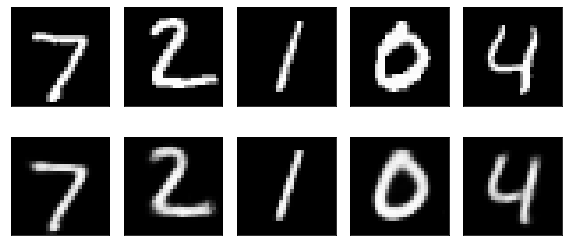

In [11]:
predictions4 = AE4.predict(X_test)
draw_predictions_set(predictions4, 'NB2-MLP-AE4')

In [12]:
# rebuild AE4 with the Functional API so we can play with the decoder alone
from keras.layers import Input

num_latent_vars = 20

AE5_encoder_input = Input(shape=(784,))
AE5_encoder_512 = Dense(512, activation='relu')
AE5_encoder_256 = Dense(256, activation='relu')
AE5_encoder_latent = Dense(num_latent_vars, activation='relu')

AE5_decoder_256 = Dense(256, activation='relu')
AE5_decoder_512 = Dense(512, activation='relu')
AE5_decoder_out = Dense(784, activation='sigmoid')

AE5_encoder_step_1 = AE5_encoder_512(AE5_encoder_input)
AE5_encoder_step_2 = AE5_encoder_256(AE5_encoder_step_1)
AE5_encoder_output = AE5_encoder_latent(AE5_encoder_step_2)

AE5_decoder_step_1 = AE5_decoder_256(AE5_encoder_output)
AE5_decoder_step_2 = AE5_decoder_512(AE5_decoder_step_1)
AE5_decoder_output = AE5_decoder_out(AE5_decoder_step_2)

AE5 = Model(AE5_encoder_input, AE5_decoder_output)

AE5_encoder_only_model = Model(AE5_encoder_input, AE5_encoder_output)

AE5_decoder_only_input = Input(shape=(num_latent_vars,))
AE5_decoder_only_step_1 = AE5_decoder_256(AE5_decoder_only_input)
AE5_decoder_only_step_2 = AE5_decoder_512(AE5_decoder_only_step_1)
AE5_decoder_only_output = AE5_decoder_out(AE5_decoder_only_step_2)
AE5_decoder_only_model = Model(AE5_decoder_only_input, AE5_decoder_only_output)

In [13]:
AE5.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE5.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 2s - loss: 0.1719 - val_loss: 0.1206
Epoch 2/50
469/469 - 2s - loss: 0.1149 - val_loss: 0.1088
Epoch 3/50
469/469 - 2s - loss: 0.1069 - val_loss: 0.1035
Epoch 4/50
469/469 - 2s - loss: 0.1026 - val_loss: 0.1007
Epoch 5/50
469/469 - 2s - loss: 0.1000 - val_loss: 0.0985
Epoch 6/50
469/469 - 2s - loss: 0.0979 - val_loss: 0.0971
Epoch 7/50
469/469 - 2s - loss: 0.0964 - val_loss: 0.0956
Epoch 8/50
469/469 - 2s - loss: 0.0951 - val_loss: 0.0945
Epoch 9/50
469/469 - 2s - loss: 0.0940 - val_loss: 0.0937
Epoch 10/50
469/469 - 2s - loss: 0.0932 - val_loss: 0.0932
Epoch 11/50
469/469 - 2s - loss: 0.0923 - val_loss: 0.0929
Epoch 12/50
469/469 - 2s - loss: 0.0917 - val_loss: 0.0922
Epoch 13/50
469/469 - 2s - loss: 0.0910 - val_loss: 0.0916
Epoch 14/50
469/469 - 2s - loss: 0.0904 - val_loss: 0.0912
Epoch 15/50
469/469 - 2s - loss: 0.0899 - val_loss: 0.0908
Epoch 16/50
469/469 - 2s - loss: 0.0895 - val_loss: 0.0905
Epoch 17/50
469/469 - 2s - loss: 0.0889 - val_loss: 0.0899
Epoch 

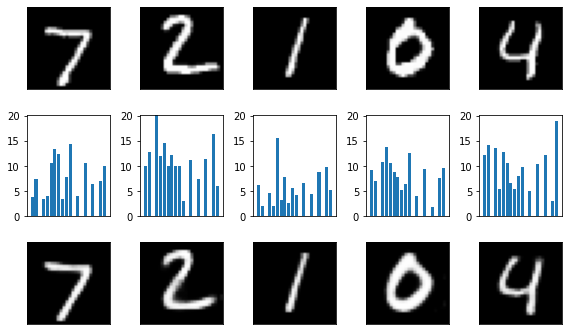

In [15]:
# show the input data, its latent values, and the corresponding predicted images
np.random.seed(random_seed)
encoder_predictions = AE5_encoder_only_model.predict(X_test)

plt.figure(figsize=(8, 5))
latent_min = np.min(encoder_predictions[0:5])
latent_max = np.max(encoder_predictions[0:5])
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.subplot(3, 5, i+6)
    plt.bar(np.arange(len(encoder_predictions[i])), encoder_predictions[i])
    plt.xticks([], [])
    plt.ylim(latent_min, latent_max)
    
    plt.subplot(3, 5, i+11)
    decoder_model_input = np.resize(encoder_predictions[i], (1, len(encoder_predictions[i])))
    decoder_prediction = AE5_decoder_only_model.predict(decoder_model_input)
    plt.imshow(decoder_prediction.reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [16]:
# show the latent values and the corresponding predicted images
# this makes big vertical spaces between the 
def show_latents_and_predictions(predictions, filename=None):
    plt.figure(figsize=(8, 4))
    latent_min = np.min(predictions[0:5])
    latent_max = np.max(predictions[0:5])
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.bar(np.arange(len(predictions[i])), predictions[i])
        plt.xticks([], [])
        plt.ylim(latent_min, latent_max)

        plt.subplot(2, 5, i+6)
        decoder_model_input = np.resize(predictions[i], (1, len(predictions[i])))
        decoder_prediction = AE5_decoder_only_model.predict(decoder_model_input)
        plt.imshow(decoder_prediction.reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()    
    plt.show()

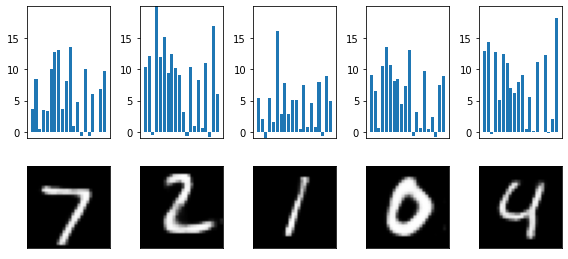

In [17]:
# add [-1,1] noise to all values
encoder_predictions = np.array(AE5_encoder_only_model.predict(X_test))
np.random.seed(random_seed)
noise = 1
for i in range(encoder_predictions.shape[0]):
    for j in range(len(encoder_predictions[i])):
        encoder_predictions[i][j] += np.random.uniform(low=-noise, high=noise)
show_latents_and_predictions(encoder_predictions, 'NB2-MLP-AE5-prediction-latent-values-with-noise-1')

# Activity #2
Add -10 to +10 noise to all variables

In [18]:
# your code here

In [19]:
# make a functional model with 2 latent variables for the scatter plot
from keras.layers import Input

num_latent_vars = 2

AE6_encoder_input = Input(shape=(784,))
AE6_encoder_512 = Dense(512, activation='relu')
AE6_encoder_256 = Dense(256, activation='relu')
AE6_encoder_latent = Dense(num_latent_vars, activation='relu')

AE6_decoder_256 = Dense(256, activation='relu')
AE6_decoder_512 = Dense(512, activation='relu')
AE6_decoder_out = Dense(784, activation='sigmoid')

AE6_encoder_step_1 = AE6_encoder_512(AE6_encoder_input)
AE6_encoder_step_2 = AE6_encoder_256(AE6_encoder_step_1)
AE6_encoder_output = AE6_encoder_latent(AE6_encoder_step_2)

AE6_decoder_step_1 = AE6_decoder_256(AE6_encoder_output)
AE6_decoder_step_2 = AE6_decoder_512(AE6_decoder_step_1)
AE6_decoder_output = AE6_decoder_out(AE6_decoder_step_2)

AE6 = Model(AE6_encoder_input, AE6_decoder_output)

AE6_encoder_only_model = Model(AE6_encoder_input, AE6_encoder_output)

AE6_decoder_only_input = Input(shape=(num_latent_vars,))
AE6_decoder_only_step_1 = AE6_decoder_256(AE6_decoder_only_input)
AE6_decoder_only_step_2 = AE6_decoder_512(AE6_decoder_only_step_1)
AE6_decoder_only_output = AE6_decoder_out(AE6_decoder_only_step_2)
AE6_decoder_only_model = Model(AE6_decoder_only_input, AE6_decoder_only_output)

AE6.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE6.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 3s - loss: 0.2348 - val_loss: 0.2073
Epoch 2/50
469/469 - 2s - loss: 0.2012 - val_loss: 0.1946
Epoch 3/50
469/469 - 2s - loss: 0.1926 - val_loss: 0.1891
Epoch 4/50
469/469 - 2s - loss: 0.1884 - val_loss: 0.1857
Epoch 5/50
469/469 - 2s - loss: 0.1853 - val_loss: 0.1832
Epoch 6/50
469/469 - 2s - loss: 0.1822 - val_loss: 0.1809
Epoch 7/50
469/469 - 2s - loss: 0.1800 - val_loss: 0.1794
Epoch 8/50
469/469 - 2s - loss: 0.1782 - val_loss: 0.1781
Epoch 9/50
469/469 - 2s - loss: 0.1767 - val_loss: 0.1764
Epoch 10/50
469/469 - 2s - loss: 0.1756 - val_loss: 0.1758
Epoch 11/50
469/469 - 2s - loss: 0.1745 - val_loss: 0.1750
Epoch 12/50
469/469 - 2s - loss: 0.1739 - val_loss: 0.1743
Epoch 13/50
469/469 - 2s - loss: 0.1731 - val_loss: 0.1736
Epoch 14/50
469/469 - 2s - loss: 0.1723 - val_loss: 0.1728
Epoch 15/50
469/469 - 2s - loss: 0.1716 - val_loss: 0.1729
Epoch 16/50
469/469 - 2s - loss: 0.1710 - val_loss: 0.1723
Epoch 17/50
469/469 - 2s - loss: 0.1705 - val_loss: 0.1717
Epoch 

In [20]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
  
# scatter plot from AE6
def draw_scatter(diameter, limits=None, filename=None):
    encoder_predictions = np.array(AE6_encoder_only_model.predict(X_test))
    np.random.seed(random_seed)

    plt.clf()
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111, aspect='equal')

    # display a 2D plot of the digit classes in the latent space
    clrs = [ 'red', 'sandybrown', 'sienna', 'gold', 'palegreen',
            'limegreen', 'deepskyblue', 'blue', 'plum', 'magenta' ]

    for i in range(len(encoder_predictions)):
        p = patches.Circle(encoder_predictions[i], diameter,
                            edgecolor='black', facecolor=clrs[y_test[i]])
        ax.add_patch(p)

    handle_list = []
    for i in range(10):
        p = patches.Patch(color=clrs[i], label=str(i))
        handle_list.append(p)
    ax.legend(handles=handle_list, loc='upper right', shadow=True)

    if limits:
        (pxmin, pxmax, pymin, pymax) = limits
    else:
        xmin = np.min(encoder_predictions[:,0])
        xmax = np.max(encoder_predictions[:,0])
        pxmin = xmin - (.05 * (xmax-xmin))
        pxmax = xmax + (.15 * (xmax-xmin))
        ymin = np.min(encoder_predictions[:,1])
        ymax = np.max(encoder_predictions[:,1])
        pymin = ymin - (.05 * (ymax-ymin))
        pymax = ymax + (.05 * (ymax-ymin))
    ax.set_ylim([pymin, pymax])
    ax.set_xlim([pxmin, pxmax])

    plt.show()

<Figure size 432x288 with 0 Axes>

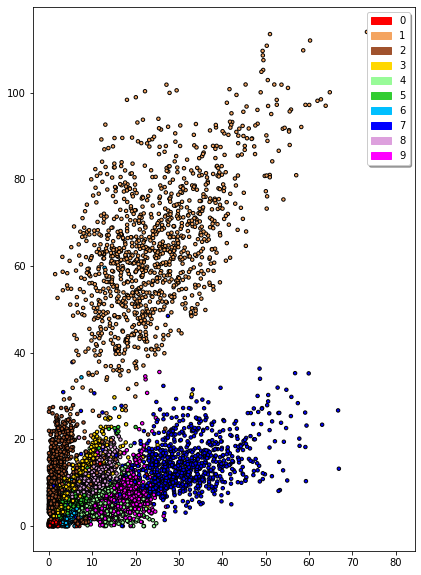

In [21]:
draw_scatter(.4, limits=None, filename='NB2-MLP-AE6-latent-scatter')

In [22]:
def draw_decoder_grid(steps=17, limits=None, filename=None):

    # display a 2D manifold of the digits
    digit_size = 28
    figure = np.zeros((digit_size * steps, digit_size * steps))
    grid_x = np.linspace(limits[1], limits[0], steps)
    grid_y = np.linspace(limits[2], limits[3], steps) 

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            
            latents = np.array([[xi, yi]])
            decoder_prediction = AE6_decoder_only_model.predict(latents)
            
            digit = decoder_prediction[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(figure, cmap='gray')    
    plt.show()

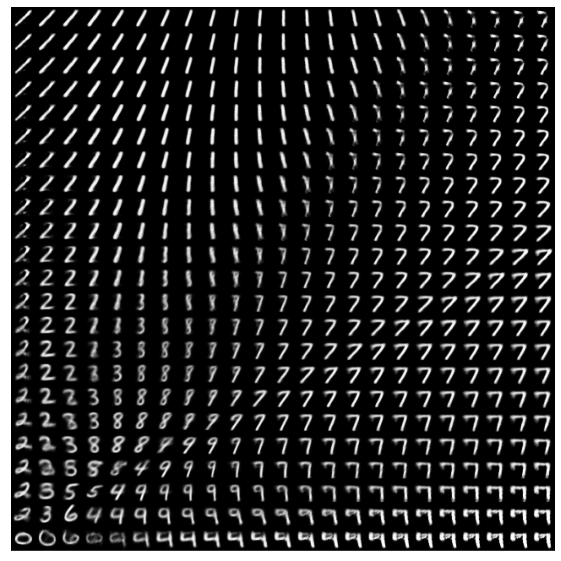

In [23]:
draw_decoder_grid(steps=23, limits=(0, 55, 0, 55), filename='NB2-MLP-AE6-17-decoder-grid')

# Activity #3
Explore the latent variables close to 0 (e.g., -1 to 10)

In [24]:
# your code here